In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [ ]:
# For newer versions of pandas
df = pd.read_csv('Groceries_dataset.csv.zip')


In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
print(df.shape)

(38765, 3)


In [ ]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Member_number,0
Date,0
itemDescription,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
one_hot_encoder = OneHotEncoder()

In [ ]:
df_encode = one_hot_encoder.fit_transform(df[['itemDescription']]).toarray()
columns = one_hot_encoder.get_feature_names_out(['itemDescription'])
groceries_df = pd.DataFrame(df_encode, columns=columns)
groceries_df


,itemDescription_Instant food products,itemDescription_UHT-milk,itemDescription_abrasive cleaner,itemDescription_artif. sweetener,itemDescription_baby cosmetics,itemDescription_bags,itemDescription_baking powder,itemDescription_bathroom cleaner,itemDescription_beef,itemDescription_berries,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Building the model

In [ ]:
frq_items = apriori(groceries_df, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Collecting the inferred rules in a DataFrame

In [ ]:
reules = association_rules(frq_items, metric='lift', min_threshold=1)
reules = reules.sort_values(['confidence', 'lift'], ascending=[False, False])

In [ ]:
print(reules.head())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [ ]:
df_encode.head()

,Member_number,Date,itemDescription_Instant food products,itemDescription_UHT-milk,itemDescription_abrasive cleaner,itemDescription_artif. sweetener,itemDescription_baby cosmetics,itemDescription_bags,itemDescription_baking powder,itemDescription_bathroom cleaner,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,21-07-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
import pandas as pd
df = pd.read_csv('Groceries_dataset.csv.zip')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# Preview the dataset
print(df.head())

# Group by 'Member_number' and 'Date' to form a transaction
df['Date'] = pd.to_datetime(df['Date'])
df['Transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)

# Create a basket-style DataFrame
basket = df.groupby(['Transaction', 'itemDescription'])['itemDescription'] \
           .count().unstack().reset_index().fillna(0).set_index('Transaction')

# Convert values to 0/1
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


<ipython-input-34-ddac0823548d>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-34-ddac0823548d>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Show the top rules
print(rules.head())


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


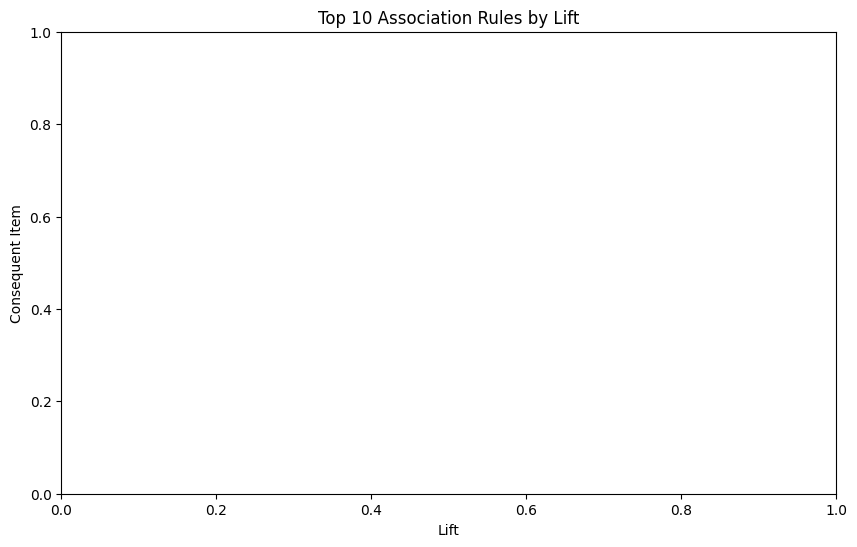

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='consequents', data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Consequent Item')
plt.show()


In [ ]:
# STEP 1: Install mlxtend
# Run this only once if it's not already installed
!pip install mlxtend


In [ ]:
import pandas as pd
df = pd.read_csv('Groceries_dataset.csv.zip')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# STEP 4: Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df['Transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)

# Create basket (transaction-item one-hot matrix)
basket = df.groupby(['Transaction', 'itemDescription'])['itemDescription'] \
           .count().unstack().reset_index().fillna(0).set_index('Transaction')

# Convert counts to 1/0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


<ipython-input-39-4b51452920cd>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-39-4b51452920cd>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
# STEP 5: Run Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print(f"Total frequent itemsets: {len(frequent_itemsets)}")


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
    support        itemsets
0  0.021386      (UHT-milk)
1  0.033950          (beef)
2  0.021787       (berries)
3  0.016574     (beverages)
4  0.045312  (bottled beer)
Total frequent itemsets: 69


In [ ]:
# STEP 6: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print("Association Rules:")
print(rules.head())
print(f"Total rules generated: {len(rules)}")


Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
Total rules generated: 0
